In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns
!pip install folium
from folium import plugins, Marker
from folium.plugins import HeatMapWithTime, MarkerCluster
!pip install calplot
import calplot

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
jul_2021 = pd.read_csv("/Users/aftabkhan/Desktop/Cyclistic Trip Data/Python/July 2021 Trip Data.csv")
aug_2021 = pd.read_csv("/Users/aftabkhan/Desktop/Cyclistic Trip Data/Python/August 2021 Trip Data.csv")
sep_2021 = pd.read_csv("/Users/aftabkhan/Desktop/Cyclistic Trip Data/Python/September 2021 Trip Data.csv")
oct_2021 = pd.read_csv("/Users/aftabkhan/Desktop/Cyclistic Trip Data/Python/October 2021 Trip Data.csv")
nov_2021 = pd.read_csv("/Users/aftabkhan/Desktop/Cyclistic Trip Data/Python/November 2021 Trip Data.csv")
dec_2021 = pd.read_csv("/Users/aftabkhan/Desktop/Cyclistic Trip Data/Python/December 2021 Trip Data.csv")
jan_2022 = pd.read_csv("/Users/aftabkhan/Desktop/Cyclistic Trip Data/Python/January 2022 Trip Data.csv")
feb_2022 = pd.read_csv("/Users/aftabkhan/Desktop/Cyclistic Trip Data/Python/February 2022 Trip Data.csv")
mar_2022 = pd.read_csv("/Users/aftabkhan/Desktop/Cyclistic Trip Data/Python/March 2022 Trip Data.csv")
apr_2022 = pd.read_csv("/Users/aftabkhan/Desktop/Cyclistic Trip Data/Python/April 2022 Trip Data.csv")
may_2022 = pd.read_csv("/Users/aftabkhan/Desktop/Cyclistic Trip Data/Python/May 2022 Trip Data.csv")
jun_2022 = pd.read_csv("/Users/aftabkhan/Desktop/Cyclistic Trip Data/Python/June 2022 Trip Data.csv")

print("CSV files imported successfully.")

CSV files imported successfully.


In [3]:
dataset = [jul_2021, aug_2021, sep_2021, oct_2021, nov_2021, dec_2021, jan_2022, feb_2022, mar_2022, apr_2022, may_2022, jun_2022]
dataset = pd.concat(dataset)

print("Datasets merged successfully.")

dataset

Datasets merged successfully.


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0A1B623926EF4E16,docked_bike,7/2/21 14:44,7/2/21 15:19,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.883984,-87.624684,41.899368,-87.648480,casual
1,B2D5583A5A5E76EE,classic_bike,7/7/21 16:57,7/7/21 17:16,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.900363,-87.696704,41.889899,-87.671473,casual
2,6F264597DDBF427A,classic_bike,7/25/21 11:30,7/25/21 11:48,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.860384,-87.625813,41.890173,-87.626185,member
3,379B58EAB20E8AA5,classic_bike,7/8/21 22:08,7/8/21 22:23,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.900363,-87.696704,41.894556,-87.653449,member
4,6615C1E4EB08E8FB,electric_bike,7/28/21 16:08,7/28/21 16:27,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.900350,-87.696682,41.886593,-87.658387,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
769199,7B3B2890CA85E05D,classic_bike,6/25/22 0:56,6/25/22 1:01,Sheffield Ave & Kingsbury St,13154,Sheffield Ave & Kingsbury St,13154,41.910522,-87.653106,41.910522,-87.653106,member
769200,1E993989CC66BCBC,classic_bike,6/25/22 0:56,6/25/22 1:00,Sheffield Ave & Kingsbury St,13154,Sheffield Ave & Kingsbury St,13154,41.910522,-87.653106,41.910522,-87.653106,member
769201,AEA166296BC67566,electric_bike,6/12/22 12:47,6/12/22 12:47,Milwaukee Ave & Fullerton Ave,428,Milwaukee Ave & Fullerton Ave,428,41.920000,-87.700000,41.920000,-87.700000,casual
769202,B9F527742959CF03,classic_bike,6/12/22 13:28,6/12/22 13:53,Clark St & Randolph St,TA1305000030,Clark St & Randolph St,TA1305000030,41.884576,-87.631890,41.884576,-87.631890,casual


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5900385 entries, 0 to 769203
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 630.2+ MB


In [5]:
dataset.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    836018
start_station_id      836015
end_station_name      892103
end_station_id        892103
start_lat                  0
start_lng                  0
end_lat                 5374
end_lng                 5374
member_casual              0
dtype: int64

In [6]:
dataset = dataset.dropna(how='any',axis=0)

print("Null values removed successfully.")

dataset.isnull().sum()

Null values removed successfully.


ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [7]:
dataset.duplicated().any()

False

In [8]:
pd.options.mode.chained_assignment = None  # default='warn'

dataset["started_at"] = pd.to_datetime(dataset["started_at"])
dataset["ended_at"] = pd.to_datetime(dataset["ended_at"])

print("Typecast of variables changed successfully.") 
dataset.info()

Typecast of variables changed successfully.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4678871 entries, 0 to 769203
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 499.8+ MB


Create new columns for datetime objects

In [9]:
dataset["start_hour"] = dataset["started_at"].dt.hour
dataset["start_hour"].unique()

array([14, 16, 11, 22, 17, 12, 18, 21, 20, 15,  7, 19,  9, 10, 13,  5,  1,
        8, 23,  4,  0,  2,  6,  3])

In [10]:
dataset["start_day_num"] = dataset["started_at"].dt.dayofweek
day_dict = {0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"}
dataset["start_day_name"]= dataset["start_day_num"].apply(lambda y:day_dict[y])

In [11]:
dataset["day_of_year"] = dataset["started_at"].dt.day_of_year

In [12]:
dataset['start_month_num'] = dataset['started_at'].dt.month
dataset["start_month_num"].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6])

In [13]:
month_dict = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}
dataset["start_month_name"]= dataset["start_month_num"].apply(lambda y:month_dict[y])
dataset["start_month_name"].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [14]:
dataset['start_year'] = dataset['started_at'].dt.year
dataset["start_year"].unique()

array([2021, 2022])

In [15]:
dataset["trip_duration"] = dataset["ended_at"] - dataset["started_at"]
dataset["trip_duration"] = pd.to_numeric(dataset["trip_duration"])/6e+10

In [16]:
dataset["trip_distance"] = np.sqrt(((dataset["end_lat"] - dataset["start_lat"])**2) + ((dataset["end_lng"] - dataset["start_lng"])**2))
dataset["trip_distance"] = dataset["trip_distance"] * 111.139

In [17]:
dataset.rename(columns = {'member_casual': 'user_type'}, inplace=True)

In [18]:
dataset["weekend"] = np.where(dataset["start_day_num"] > 5, True, False)

In [19]:
dataset.sort_values(by = ["started_at"], inplace = True, ascending = True)
dataset

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,start_hour,start_day_num,start_day_name,day_of_year,start_month_num,start_month_name,start_year,trip_duration,trip_distance,weekend
247538,8A1D30385234151D,classic_bike,2021-07-01 00:00:00,2021-07-01 00:28:00,Michigan Ave & Lake St,TA1305000011,Wabash Ave & Wacker Pl,TA1307000131,41.886024,-87.624117,...,0,3,Wednesday,182,7,July,2021,28.0,0.232697,False
782139,D5AA171FAE3335A7,classic_bike,2021-07-01 00:00:00,2021-07-01 00:16:00,Wabash Ave & Wacker Pl,TA1307000131,Wells St & Concord Ln,TA1308000050,41.886875,-87.626030,...,0,3,Wednesday,182,7,July,2021,16.0,2.966338,False
433589,3FBF4B489DE3F24E,docked_bike,2021-07-01 00:00:00,2021-07-01 00:10:00,Clark St & Winnemac Ave,TA1309000035,Broadway & Thorndale Ave,15575,41.973348,-87.667855,...,0,3,Wednesday,182,7,July,2021,10.0,2.013739,False
678771,B68C8C61487B5C15,classic_bike,2021-07-01 00:00:00,2021-07-01 00:46:00,Bissell St & Armitage Ave,13059,Lincoln Ave & Diversey Pkwy,TA1307000064,41.918440,-87.652220,...,0,3,Wednesday,182,7,July,2021,46.0,1.688976,False
173982,D493F6B96A3117A2,classic_bike,2021-07-01 00:01:00,2021-07-01 00:14:00,Halsted St & 18th St,13099,Morgan St & 31st St,TA1308000046,41.857499,-87.646277,...,0,3,Wednesday,182,7,July,2021,13.0,2.255052,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673991,90994A72CEA06EED,electric_bike,2022-06-30 23:59:00,2022-07-01 02:09:00,Franklin St & Chicago Ave,13017,Clark St & Chicago Ave,13303,41.896774,-87.635595,...,23,3,Wednesday,181,6,June,2022,130.0,0.522879,False
427682,2CD209F207D413AF,classic_bike,2022-06-30 23:59:00,2022-07-01 00:05:00,Dearborn St & Monroe St,TA1305000006,State St & Harrison St,SL-007,41.881320,-87.629521,...,23,3,Wednesday,181,6,June,2022,6.0,0.832166,False
673992,04386E078470EF49,electric_bike,2022-06-30 23:59:00,2022-07-01 02:09:00,Franklin St & Chicago Ave,13017,Clark St & Chicago Ave,13303,41.896778,-87.635707,...,23,3,Wednesday,181,6,June,2022,130.0,0.535347,False
40206,B44E5830EDC1B0F9,classic_bike,2022-06-30 23:59:00,2022-07-01 00:20:00,Southport Ave & Roscoe St,13071,Ravenswood Ave & Lawrence Ave,TA1309000066,41.943739,-87.664020,...,23,3,Wednesday,181,6,June,2022,21.0,3.037696,False


In [20]:
dataset["trip_duration"].describe(include = "all")

count    4.678871e+06
mean     1.926158e+01
std      1.186633e+02
min     -1.290000e+02
25%      7.000000e+00
50%      1.100000e+01
75%      2.100000e+01
max      4.910700e+04
Name: trip_duration, dtype: float64

In [21]:
trip_mins = dataset[["started_at", "ended_at", "trip_duration"]]
trip_mins.nlargest(10, ["trip_duration"])

,started_at,ended_at,trip_duration
640346,2021-07-08 19:29:00,2021-08-11 21:56:00,49107.0
16034,2021-07-08 15:13:00,2021-08-06 13:18:00,41645.0
192711,2021-08-01 18:53:00,2021-08-30 16:42:00,41629.0
331390,2021-07-10 15:59:00,2021-08-07 22:43:00,40724.0
360554,2021-10-02 18:35:00,2021-10-31 01:00:00,40705.0
433794,2021-07-03 18:39:00,2021-07-31 19:00:00,40341.0
105109,2021-07-08 19:26:00,2021-08-05 07:13:00,39587.0
114355,2021-07-09 17:59:00,2021-08-05 14:44:00,38685.0
67464,2022-03-05 19:08:00,2022-03-29 15:43:00,34355.0
207590,2021-07-18 21:30:00,2021-08-11 08:37:00,33787.0


In [22]:
# removing outliers by creating filters
outliers_trip_duration = (dataset["trip_duration"] < 1) | (dataset["trip_duration"] > 480)
outliers_trip_duration.value_counts()

False    4635665
True       43206
Name: trip_duration, dtype: int64

In [23]:
dataset.drop(dataset.index[outliers_trip_duration], inplace = True)

print("Inconsistent values deleted successfully.")

Inconsistent values deleted successfully.


In [24]:
dataset

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,start_hour,start_day_num,start_day_name,day_of_year,start_month_num,start_month_name,start_year,trip_duration,trip_distance,weekend
247538,8A1D30385234151D,classic_bike,2021-07-01 00:00:00,2021-07-01 00:28:00,Michigan Ave & Lake St,TA1305000011,Wabash Ave & Wacker Pl,TA1307000131,41.886024,-87.624117,...,0,3,Wednesday,182,7,July,2021,28.0,0.232697,False
782139,D5AA171FAE3335A7,classic_bike,2021-07-01 00:00:00,2021-07-01 00:16:00,Wabash Ave & Wacker Pl,TA1307000131,Wells St & Concord Ln,TA1308000050,41.886875,-87.626030,...,0,3,Wednesday,182,7,July,2021,16.0,2.966338,False
433589,3FBF4B489DE3F24E,docked_bike,2021-07-01 00:00:00,2021-07-01 00:10:00,Clark St & Winnemac Ave,TA1309000035,Broadway & Thorndale Ave,15575,41.973348,-87.667855,...,0,3,Wednesday,182,7,July,2021,10.0,2.013739,False
678771,B68C8C61487B5C15,classic_bike,2021-07-01 00:00:00,2021-07-01 00:46:00,Bissell St & Armitage Ave,13059,Lincoln Ave & Diversey Pkwy,TA1307000064,41.918440,-87.652220,...,0,3,Wednesday,182,7,July,2021,46.0,1.688976,False
173982,D493F6B96A3117A2,classic_bike,2021-07-01 00:01:00,2021-07-01 00:14:00,Halsted St & 18th St,13099,Morgan St & 31st St,TA1308000046,41.857499,-87.646277,...,0,3,Wednesday,182,7,July,2021,13.0,2.255052,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673991,90994A72CEA06EED,electric_bike,2022-06-30 23:59:00,2022-07-01 02:09:00,Franklin St & Chicago Ave,13017,Clark St & Chicago Ave,13303,41.896774,-87.635595,...,23,3,Wednesday,181,6,June,2022,130.0,0.522879,False
427682,2CD209F207D413AF,classic_bike,2022-06-30 23:59:00,2022-07-01 00:05:00,Dearborn St & Monroe St,TA1305000006,State St & Harrison St,SL-007,41.881320,-87.629521,...,23,3,Wednesday,181,6,June,2022,6.0,0.832166,False
673992,04386E078470EF49,electric_bike,2022-06-30 23:59:00,2022-07-01 02:09:00,Franklin St & Chicago Ave,13017,Clark St & Chicago Ave,13303,41.896778,-87.635707,...,23,3,Wednesday,181,6,June,2022,130.0,0.535347,False
40206,B44E5830EDC1B0F9,classic_bike,2022-06-30 23:59:00,2022-07-01 00:20:00,Southport Ave & Roscoe St,13071,Ravenswood Ave & Lawrence Ave,TA1309000066,41.943739,-87.664020,...,23,3,Wednesday,181,6,June,2022,21.0,3.037696,False


307067 out of 4678871 rows. 6.6% of total rows

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4371804 entries, 247538 to 675689
Data columns (total 23 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  user_type           object        
 13  start_hour          int64         
 14  start_day_num       int64         
 15  start_day_name      object        
 16  day_of_year         int64         
 17  start_month_num     int64         
 18  start_month_name    object        
 19  start_year          int64         
 20

In [111]:
dataset_time = dataset.iloc[:, [1, 2, 3, 12, 13, 16, 14, 17, 20, 21, 22]]
dataset_time.insert(9, "rides_num", 1)
dataset_time

,rideable_type,started_at,ended_at,user_type,start_hour,day_of_year,start_day_num,start_month_num,trip_duration,rides_num,trip_distance,weekend
247538,classic_bike,2021-07-01 00:00:00,2021-07-01 00:28:00,casual,0,182,3,7,28.0,1,0.232697,False
782139,classic_bike,2021-07-01 00:00:00,2021-07-01 00:16:00,casual,0,182,3,7,16.0,1,2.966338,False
433589,docked_bike,2021-07-01 00:00:00,2021-07-01 00:10:00,casual,0,182,3,7,10.0,1,2.013739,False
678771,classic_bike,2021-07-01 00:00:00,2021-07-01 00:46:00,casual,0,182,3,7,46.0,1,1.688976,False
173982,classic_bike,2021-07-01 00:01:00,2021-07-01 00:14:00,casual,0,182,3,7,13.0,1,2.255052,False
...,...,...,...,...,...,...,...,...,...,...,...,...
673991,electric_bike,2022-06-30 23:59:00,2022-07-01 02:09:00,casual,23,181,3,6,130.0,1,0.522879,False
427682,classic_bike,2022-06-30 23:59:00,2022-07-01 00:05:00,casual,23,181,3,6,6.0,1,0.832166,False
673992,electric_bike,2022-06-30 23:59:00,2022-07-01 02:09:00,casual,23,181,3,6,130.0,1,0.535347,False
40206,classic_bike,2022-06-30 23:59:00,2022-07-01 00:20:00,casual,23,181,3,6,21.0,1,3.037696,False


In [112]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4371804 entries, 247538 to 675689
Data columns (total 23 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  user_type           object        
 13  start_hour          int64         
 14  start_day_num       int64         
 15  start_day_name      object        
 16  day_of_year         int64         
 17  start_month_num     int64         
 18  start_month_name    object        
 19  start_year          int64         
 20

In [113]:
dataset_gps = dataset.iloc[:, [2, 4, 5, 3, 6, 7, 8, 9, 10, 11, 12, 14, 20, 21]]
dataset_gps

,started_at,start_station_name,start_station_id,ended_at,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,start_day_num,trip_duration,trip_distance
247538,2021-07-01 00:00:00,Michigan Ave & Lake St,TA1305000011,2021-07-01 00:28:00,Wabash Ave & Wacker Pl,TA1307000131,41.886024,-87.624117,41.886875,-87.626030,casual,3,28.0,0.232697
782139,2021-07-01 00:00:00,Wabash Ave & Wacker Pl,TA1307000131,2021-07-01 00:16:00,Wells St & Concord Ln,TA1308000050,41.886875,-87.626030,41.912133,-87.634656,casual,3,16.0,2.966338
433589,2021-07-01 00:00:00,Clark St & Winnemac Ave,TA1309000035,2021-07-01 00:10:00,Broadway & Thorndale Ave,15575,41.973348,-87.667855,41.989743,-87.660141,casual,3,10.0,2.013739
678771,2021-07-01 00:00:00,Bissell St & Armitage Ave,13059,2021-07-01 00:46:00,Lincoln Ave & Diversey Pkwy,TA1307000064,41.918440,-87.652220,41.932225,-87.658617,casual,3,46.0,1.688976
173982,2021-07-01 00:01:00,Halsted St & 18th St,13099,2021-07-01 00:14:00,Morgan St & 31st St,TA1308000046,41.857499,-87.646277,41.837800,-87.651140,casual,3,13.0,2.255052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673991,2022-06-30 23:59:00,Franklin St & Chicago Ave,13017,2022-07-01 02:09:00,Clark St & Chicago Ave,13303,41.896774,-87.635595,41.896750,-87.630890,casual,3,130.0,0.522879
427682,2022-06-30 23:59:00,Dearborn St & Monroe St,TA1305000006,2022-07-01 00:05:00,State St & Harrison St,SL-007,41.881320,-87.629521,41.874053,-87.627716,casual,3,6.0,0.832166
673992,2022-06-30 23:59:00,Franklin St & Chicago Ave,13017,2022-07-01 02:09:00,Clark St & Chicago Ave,13303,41.896778,-87.635707,41.896750,-87.630890,casual,3,130.0,0.535347
40206,2022-06-30 23:59:00,Southport Ave & Roscoe St,13071,2022-07-01 00:20:00,Ravenswood Ave & Lawrence Ave,TA1309000066,41.943739,-87.664020,41.969090,-87.674237,casual,3,21.0,3.037696


In [114]:
dataset.to_csv('cyclistic_dataset.csv', index=False)

print("Dataset exported as CSV file successfully.")

Dataset exported as CSV file successfully.


In [115]:
dataset_time.to_csv("time_based_data.csv", index = False)

print("Dataset exported as CSV file successfully.")

Dataset exported as CSV file successfully.


In [116]:
dataset_gps.to_csv("gps_based_data.csv", index = False)

print("Dataset exporte as CSV file successfully.")

Dataset exporte as CSV file successfully.


# ANALYSIS

### Time Based Analysis - Weekdays

In [117]:
casuals = dataset_time[dataset_time["user_type"] == "casual"]
members = dataset_time[dataset_time["user_type"] == "member"]

In [118]:
pd.options.mode.chained_assignment = None  # default='warn'

casuals_weekday = casuals[casuals["weekend"] == False]
members_weekday = members[members["weekend"] == False]

In [119]:
casuals_weekend = casuals[casuals["weekend"] == True]
members_weekend = members[members["weekend"] == True] 

In [120]:
casuals["start_hour"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

#### User Activity Across the Day

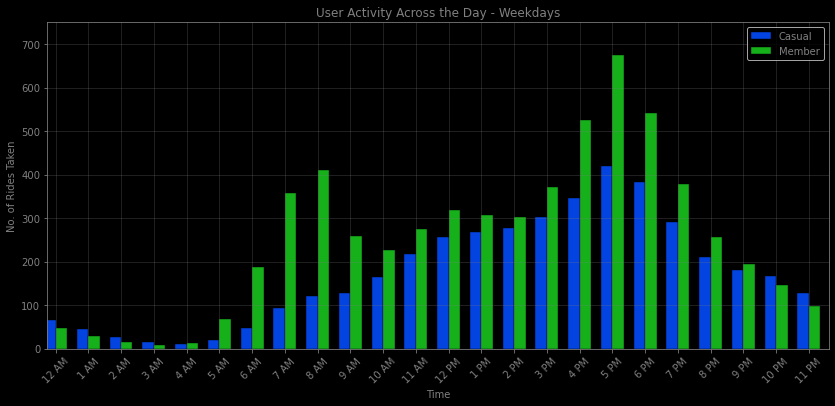

In [148]:
plt.figure(figsize = (14, 6))

casuals_weekday["start_hour"].value_counts().div(members["day_of_year"].nunique()).sort_index().plot.bar(color = "#0343DF", align = "edge", width = -.35, linewidth = .4, edgecolor = "k", ylim = (0,750))
members_weekday["start_hour"].value_counts().div(casuals["day_of_year"].nunique()).sort_index().plot.bar(color = "#15B01A", align = "edge", width = .35, linewidth = .4, edgecolor = "k", ylim = (0,750))

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], 
           ["12 AM", "1 AM", "2 AM", "3 AM", "4 AM", "5 AM", "6 AM", "7 AM", "8 AM", "9 AM", "10 AM", "11 AM", "12 PM", "1 PM", "2 PM", "3 PM", "4 PM", "5 PM", "6 PM", "7 PM", "8 PM", "9 PM", "10 PM", "11 PM"],
           rotation = 45)

plt.xlabel("Time")
plt.ylabel("No. of Rides Taken")
plt.title("User Activity Across the Day - Weekdays")
plt.legend(["Casual", "Member"])
plt.grid(alpha = 0.3)

#### Trip Duration Across the Day

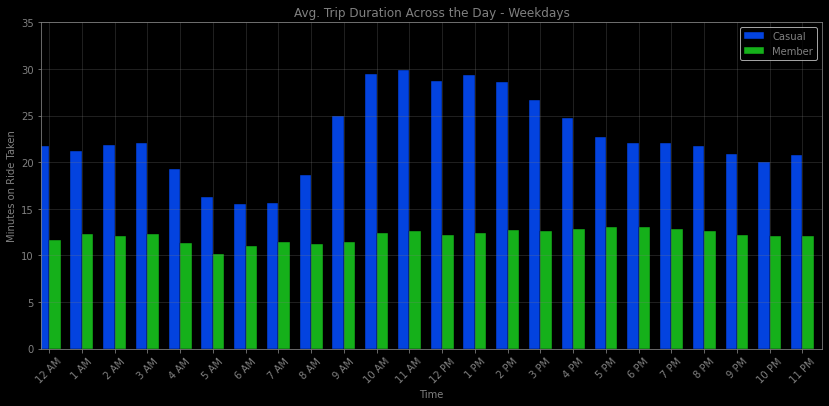

In [147]:
plt.figure(figsize=(14,6))

casuals_weekday.groupby("start_hour")["trip_duration"].mean().plot.bar(color = "#0343DF", align = "edge", width = -.35, linewidth = .4, edgecolor = "k", ylim = (0,35))
members_weekday.groupby("start_hour")["trip_duration"].mean().plot.bar(color = "#15B01A", align = "edge", width = .35, linewidth = .4, edgecolor = "k", ylim = (0,35))

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], 
           ["12 AM", "1 AM", "2 AM", "3 AM", "4 AM", "5 AM", "6 AM", "7 AM", "8 AM", "9 AM", "10 AM", "11 AM", "12 PM", "1 PM", "2 PM", "3 PM", "4 PM", "5 PM", "6 PM", "7 PM", "8 PM", "9 PM", "10 PM", "11 PM"], rotation = 45)
plt.xlabel("Time")
plt.ylabel("Minutes on Ride Taken")
plt.title("Avg. Trip Duration Across the Day - Weekdays")
plt.legend(['Casual', 'Member'])
plt.grid(alpha = 0.3)

#### Distance Travelled Across the Day

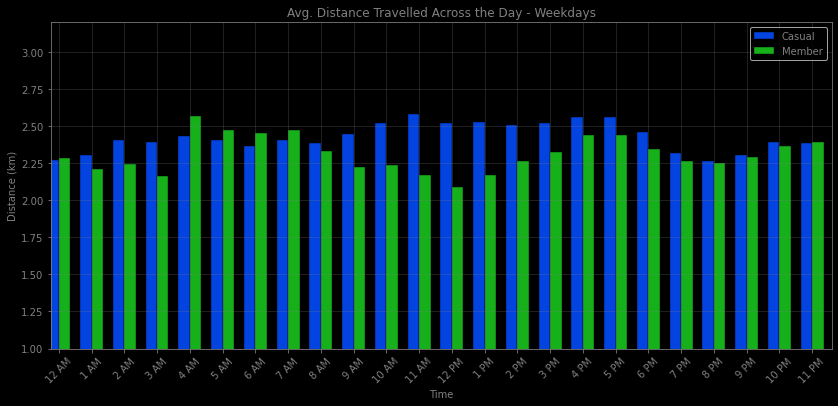

In [146]:
plt.figure(figsize=(14,6))

casuals_weekday.groupby("start_hour")["trip_distance"].mean().plot.bar(color = "#0343DF", align = "edge", width = -.35, linewidth = .4, edgecolor = "k", ylim = (1,3.2))
members_weekday.groupby("start_hour")["trip_distance"].mean().plot.bar(color = "#15B01A", align = "edge", width = .35, linewidth = .4, edgecolor = "k", ylim = (1,3.2))

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], 
           ["12 AM", "1 AM", "2 AM", "3 AM", "4 AM", "5 AM", "6 AM", "7 AM", "8 AM", "9 AM", "10 AM", "11 AM", "12 PM", "1 PM", "2 PM", "3 PM", "4 PM", "5 PM", "6 PM", "7 PM", "8 PM", "9 PM", "10 PM", "11 PM"], rotation = 45)
plt.xlabel("Time")
plt.ylabel("Distance (km)")
plt.title("Avg. Distance Travelled Across the Day - Weekdays")
plt.legend(['Casual', 'Member'])
plt.grid(alpha = 0.3)

In [124]:
diff_bw_users = casuals_weekday.groupby("start_hour")["trip_duration"].mean().round().to_frame("casuals")
diff_bw_users["members"] = members_weekday.groupby("start_hour")["trip_duration"].mean().round().to_frame("members")
diff_bw_users["difference"] = (diff_bw_users["casuals"] - diff_bw_users["members"]).round()
diff_bw_users["difference (%)"] = ((diff_bw_users["casuals"] - diff_bw_users["members"]) / diff_bw_users["casuals"] * 100).round()
diff_bw_users

,casuals,members,difference,difference (%)
start_hour,,,,
0,22.0,12.0,10.0,45.0
1,21.0,12.0,9.0,43.0
2,22.0,12.0,10.0,45.0
3,22.0,12.0,10.0,45.0
4,19.0,11.0,8.0,42.0
5,16.0,10.0,6.0,38.0
6,16.0,11.0,5.0,31.0
7,16.0,11.0,5.0,31.0
8,19.0,11.0,8.0,42.0


#### Observations

1. Number of Rides:
For members we see a double peak in ridership at 7-8am and 4-6pm, in line with commuting hours. For casuals a gradual rise starting from 5am with a minute bump in ridership at 8am, followed by peak ridership at 5pm before dropping.

2. Ride Minutes: 
For members, ride minutes are relatively consistent through the week ranging from 12-14mins. For casuals, the average ride minutes are higher than that of members. Ride minutes for casuals are lowest between 4-6am before rising and peaks between 10am-1pm.

3. Ride Distance:
For both we see double peaks at 4am-5am and again at 4-5pm for ride distances. Ridership is the lowest between 4-5am however, they travelled the furthest on average between 2.6-2.8km. We see the lowest distance travelled between the lunch hours of 11-12pm.

### Time Based Analysis - Weekends

#### User Activity Across the Day

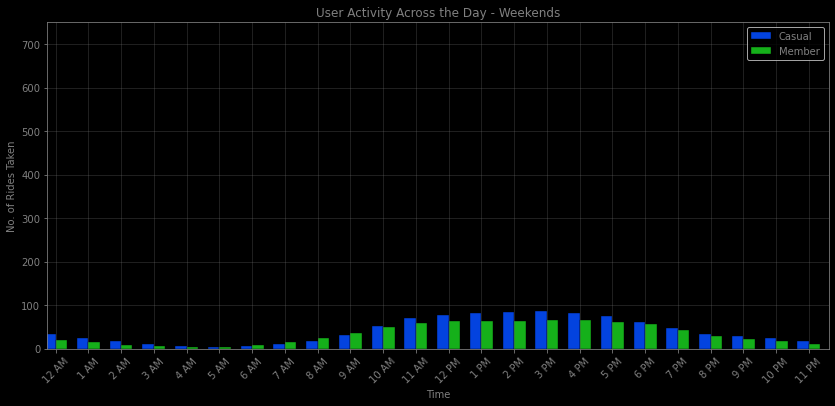

In [145]:
plt.figure(figsize = (14, 6))

casuals_weekend["start_hour"].value_counts().div(members["day_of_year"].nunique()).sort_index().plot.bar(color = "#0343DF", align = "edge", width = -.35, linewidth = .4, edgecolor = "k", ylim = (0,750))
members_weekend["start_hour"].value_counts().div(casuals["day_of_year"].nunique()).sort_index().plot.bar(color = "#15B01A", align = "edge", width = .35, linewidth = .4, edgecolor = "k", ylim = (0,750))

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], 
           ["12 AM", "1 AM", "2 AM", "3 AM", "4 AM", "5 AM", "6 AM", "7 AM", "8 AM", "9 AM", "10 AM", "11 AM", "12 PM", "1 PM", "2 PM", "3 PM", "4 PM", "5 PM", "6 PM", "7 PM", "8 PM", "9 PM", "10 PM", "11 PM"],
           rotation = 45)

plt.xlabel("Time")
plt.ylabel("No. of Rides Taken")
plt.title("User Activity Across the Day - Weekends")
plt.legend(["Casual", "Member"])
plt.grid(alpha = 0.3)

plt.show()

#### Trip Duration Across the Day

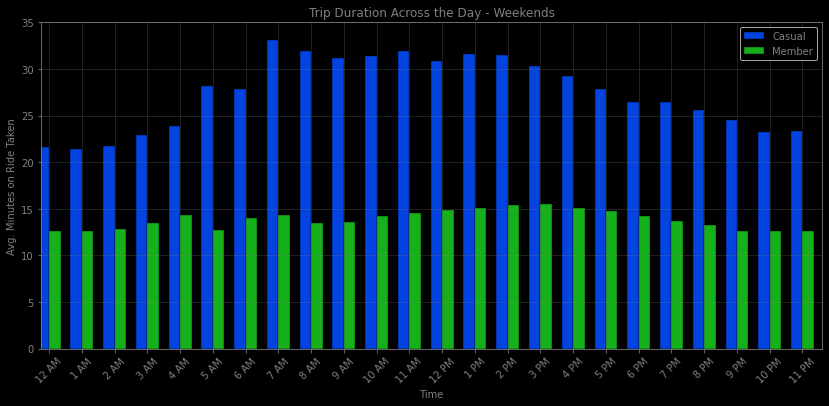

In [144]:
plt.figure(figsize=(14,6))

casuals_weekend.groupby("start_hour")["trip_duration"].mean().plot.bar(color = "#0343DF", align = "edge", width = -.35, linewidth = .4, edgecolor = "k", ylim = (0,35))
members_weekend.groupby("start_hour")["trip_duration"].mean().plot.bar(color = "#15B01A", align = "edge", width = .35, linewidth = .4, edgecolor = "k", ylim = (0,35))

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], 
           ["12 AM", "1 AM", "2 AM", "3 AM", "4 AM", "5 AM", "6 AM", "7 AM", "8 AM", "9 AM", "10 AM", "11 AM", "12 PM", "1 PM", "2 PM", "3 PM", "4 PM", "5 PM", "6 PM", "7 PM", "8 PM", "9 PM", "10 PM", "11 PM"], rotation = 45)

plt.xlabel("Time")
plt.ylabel("Avg. Minutes on Ride Taken")
plt.title("Trip Duration Across the Day - Weekends")
plt.legend(['Casual', 'Member'])

plt.grid(alpha = 0.3)

#### Distance Travelled Across the Day

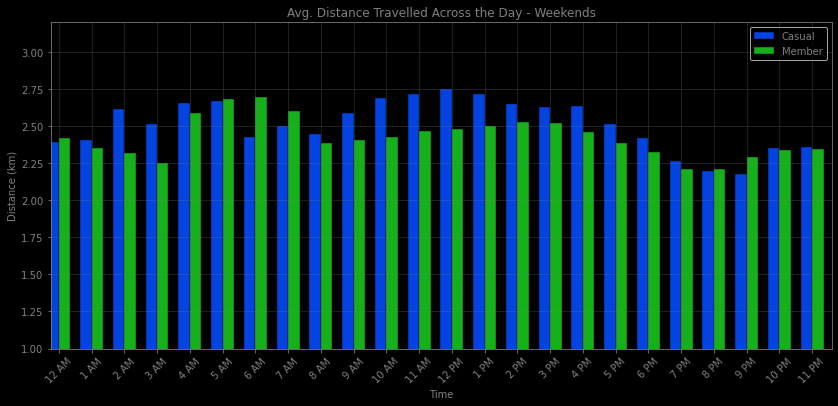

In [153]:
plt.figure(figsize=(14,6))

casuals_weekend.groupby("start_hour")["trip_distance"].mean().plot.bar(color = "#0343DF", align = "edge", width = -.35, linewidth = .4, edgecolor = "k", ylim = (1,3.2))
members_weekend.groupby("start_hour")["trip_distance"].mean().plot.bar(color = "#15B01A", align = "edge", width = .35, linewidth = .4, edgecolor = "k", ylim = (1,3.2))

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], 
           ["12 AM", "1 AM", "2 AM", "3 AM", "4 AM", "5 AM", "6 AM", "7 AM", "8 AM", "9 AM", "10 AM", "11 AM", "12 PM", "1 PM", "2 PM", "3 PM", "4 PM", "5 PM", "6 PM", "7 PM", "8 PM", "9 PM", "10 PM", "11 PM"], rotation = 45)
plt.xlabel("Time")
plt.ylabel("Distance (km)")
plt.title("Avg. Distance Travelled Across the Day - Weekends")
plt.legend(["Casual", "Member"])
plt.grid(alpha = 0.3)

In [128]:
diff_bw_users_wends = casuals_weekend.groupby("start_hour")["trip_duration"].mean().round().to_frame("casuals")
diff_bw_users_wends["members"] = members_weekend.groupby("start_hour")["trip_duration"].mean().round().to_frame("members")
diff_bw_users_wends["difference"] = (diff_bw_users_wends["casuals"] - diff_bw_users_wends["members"]).round()
diff_bw_users_wends["difference (%)"] = ((diff_bw_users_wends["casuals"] - diff_bw_users_wends["members"]) / diff_bw_users_wends["casuals"] * 100).round()
diff_bw_users_wends

,casuals,members,difference,difference (%)
start_hour,,,,
0,22.0,13.0,9.0,41.0
1,21.0,13.0,8.0,38.0
2,22.0,13.0,9.0,41.0
3,23.0,13.0,10.0,43.0
4,24.0,14.0,10.0,42.0
5,28.0,13.0,15.0,54.0
6,28.0,14.0,14.0,50.0
7,33.0,14.0,19.0,58.0
8,32.0,13.0,19.0,59.0


#### Observations
1. Number of Rides:
Ridership rises and falls according to the active hours of people through the day. The number of rides for Members is slightly higher than casual riders between 6-9am, before casual ridership surpasses that for the rest of the day. Peaks in ridership for both users between 1-3pm.
2. Ride Minutes:
Casuals take longer rides than members. The difference in ride minutes between both users can range between 38-59% through the day.
3. Ride Distance:
Distances peak at 12am and 1pm for casuals. It peaks at 5am and 6am for members.

### Time Based Analysis - Daily Basis

In [130]:
casuals["start_day_num"].unique()

array([3, 4, 5, 6, 0, 1, 2])

In [138]:
members["start_day_num"].unique()

array([3, 4, 5, 6, 0, 1, 2])

#### User Activity Across the Week

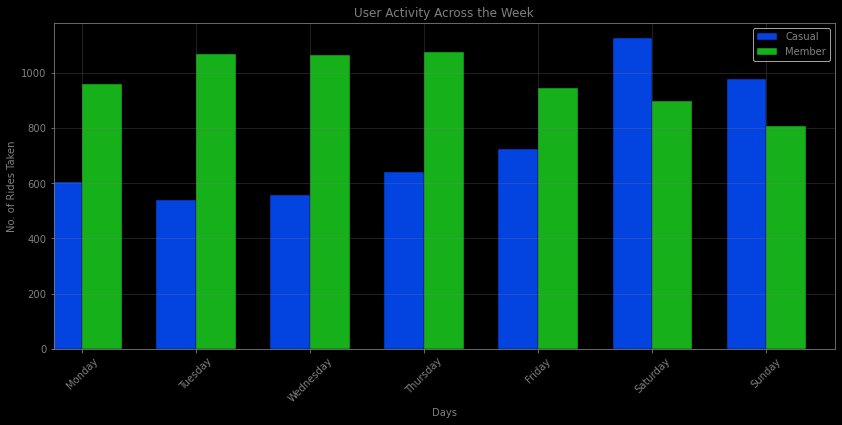

In [149]:
plt.figure(figsize = (14, 6))

casuals["start_day_num"].value_counts().div(members["day_of_year"].nunique()).sort_index().plot.bar(color = "#0343DF", align = "edge", width = -.35, linewidth = .4, edgecolor = "k")
members["start_day_num"].value_counts().div(casuals["day_of_year"].nunique()).sort_index().plot.bar(color = "#15B01A", align = "edge", width = .35, linewidth = .4, edgecolor = "k")

plt.xticks([0, 1, 2, 3, 4, 5, 6], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation = 45)

plt.xlabel("Days")
plt.ylabel("No. of Rides Taken")
plt.title("User Activity Across the Week")
plt.legend(["Casual", "Member"])
plt.grid(alpha = 0.3)

#### Trip Duration Across the Day

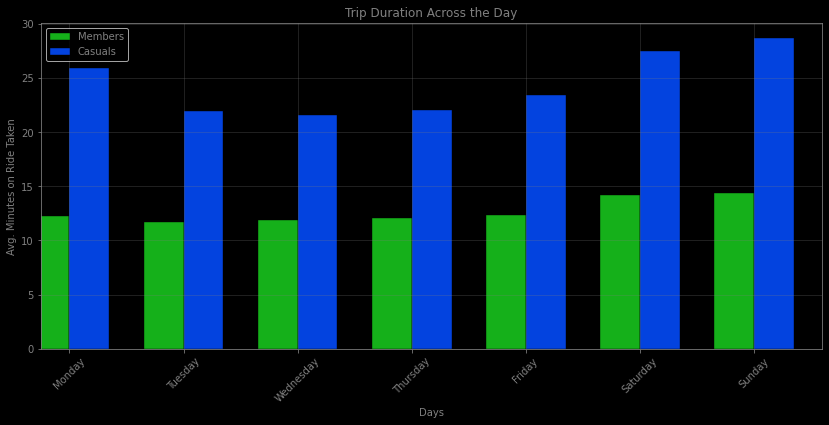

In [152]:
plt.figure(figsize = (14, 6))

members.groupby("start_day_num")["trip_duration"].mean().plot.bar(color = "#15B01A", align = "edge", width = -.35, linewidth = .4, edgecolor = "k")
casuals.groupby("start_day_num")["trip_duration"].mean().plot.bar(color = "#0343DF", align = "edge", width = .35, linewidth = .4, edgecolor = "k")


plt.xticks([0, 1, 2, 3, 4, 5, 6], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation = 45)

plt.xlabel("Days")
plt.ylabel("Avg. Minutes on Ride Taken")
plt.title("Trip Duration Across the Day")
plt.legend(["Members", "Casuals"])

plt.grid(alpha=0.3)

#### Distance Travelled Across the Day

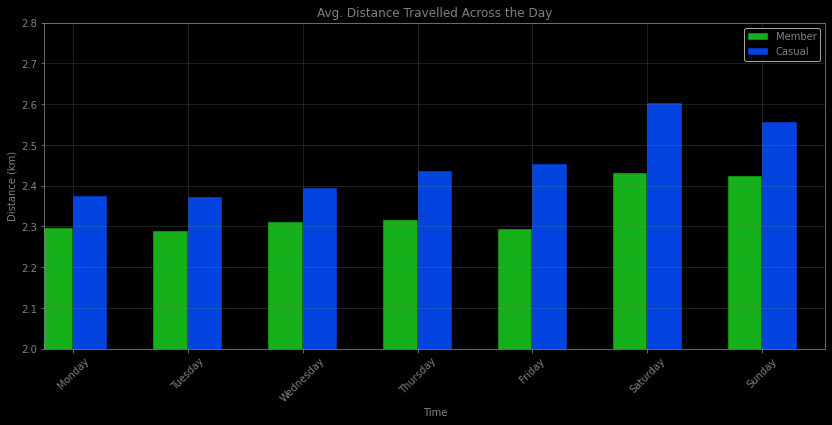

In [156]:
plt.figure(figsize = (14, 6))

members.groupby("start_day_num")["trip_distance"].mean().plot.bar(color = "#15B01A", align = "edge", width = -.3, linewidth = .4, edgecolor = "k", ylim = (2,2.8))
casuals.groupby("start_day_num")["trip_distance"].mean().plot.bar(color = "#0343DF", align = "edge", width = .3, linewidth = .4, edgecolor = "k", ylim = (2,2.8))

plt.xticks([0, 1, 2, 3, 4, 5, 6], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation = 45)

plt.xlabel("Time")
plt.ylabel("Distance (km)")
plt.title("Avg. Distance Travelled Across the Day")
plt.legend(["Member", "Casual"])
plt.grid(alpha = 0.3)

In [157]:
diff_bw_users_pday = casuals.groupby("start_day_num")["trip_duration"].mean().round().to_frame("casuals")
diff_bw_users_pday["members"] = members.groupby("start_hour")["trip_duration"].mean().round().to_frame("members")
diff_bw_users_pday["difference"] = (diff_bw_users_pday["casuals"] - diff_bw_users_pday["members"]).round()
diff_bw_users_pday["difference (%)"] = ((diff_bw_users_pday["casuals"] - diff_bw_users_pday["members"]) / diff_bw_users_pday["casuals"] * 100).round()
diff_bw_users_pday

,casuals,members,difference,difference (%)
start_day_num,,,,
0,26.0,12.0,14.0,54.0
1,22.0,12.0,10.0,45.0
2,22.0,12.0,10.0,45.0
3,22.0,13.0,9.0,41.0
4,23.0,12.0,11.0,48.0
5,27.0,10.0,17.0,63.0
6,29.0,11.0,18.0,62.0


In [158]:
diff_bw_rides_pday = casuals[["start_day_num"]].value_counts().to_frame("casuals").sort_values(by = ["start_day_num"]).pct_change().fillna(0).mul(100).round(1)
diff_bw_rides_pday["members"] = members[["start_day_num"]].value_counts().to_frame("members").sort_values(by = ["start_day_num"]).pct_change().fillna(0).mul(100).round(1)
diff_bw_rides_pday

,casuals,members
start_day_num,,
0,0.0,0.0
1,-11.1,11.0
2,3.1,-0.3
3,15.0,1.0
4,13.1,-11.9
5,55.7,-5.1
6,-13.2,-10.3


#### Observations

1. Number of Rides:
For members ridership peaks on Wednesday with a 12% increase and then a very gradual decrease throughout the weekdays. A large drop of 13% in ridership on Sundays. For casuals we see a noticeable jump in ridership over the weekends with a 27.2% increase on Fridays, 53.3% increase on Saturdays.

2. Ride Minutes:
Ride minutes for both users increases over the weekends before dropping again from Monday onwards. Casuals have higher ride minutes, between 20-50% higher than members.

3. Ride Distance:
Casuals travel further than members throughout the week. Travel distances are longer over the weekends.